# 익명성을 위해 Username 을 제거

In [2]:
del GO_data['SummonerName']

In [3]:
GO_data

,TEAM_WIns,SOLO_WIns,TEAM_Losses,SOLO_Losses,win,lose,defaultRating,additionalRating,SOLO_TIAR_SCORE,TEAM_TIAR_SCORE,Graves_Rating
0,26,249,27,238,11,6,600,39,600,475,639
1,40,31,33,13,174,160,725,20,725,650,745
2,23,37,16,23,0,0,625,0,600,600,625
3,19,68,18,58,77,54,775,153,775,675,928
4,21,42,17,30,8,4,750,33,700,575,783
...,...,...,...,...,...,...,...,...,...,...,...
97,11,44,3,50,5,8,550,-19,525,400,531
98,30,94,32,64,0,1,775,-8,700,675,767
99,72,77,75,66,4,10,700,-51,725,550,649
100,5,10,6,11,1,4,400,-24,400,350,376


# 최종 목표 :  분류 적용 

1. y값인 Graves_Rating 을 4개의 그룹으로 나눈다
    분위수를 사용하여, 25%, 50%,75% 기준으로 나눔 
    
2. 두 변수간의 상관관계가 높은 컬럼은 제거

In [4]:
# 컬럼명 전체 변경 : df.columns = ['col', 'col', 'col']

GO_data.rename(columns={'Graves_Rating':'y'},inplace = True)

In [5]:
GO_data

,TEAM_WIns,SOLO_WIns,TEAM_Losses,SOLO_Losses,win,lose,defaultRating,additionalRating,SOLO_TIAR_SCORE,TEAM_TIAR_SCORE,y
0,26,249,27,238,11,6,600,39,600,475,639
1,40,31,33,13,174,160,725,20,725,650,745
2,23,37,16,23,0,0,625,0,600,600,625
3,19,68,18,58,77,54,775,153,775,675,928
4,21,42,17,30,8,4,750,33,700,575,783
...,...,...,...,...,...,...,...,...,...,...,...
97,11,44,3,50,5,8,550,-19,525,400,531
98,30,94,32,64,0,1,775,-8,700,675,767
99,72,77,75,66,4,10,700,-51,725,550,649
100,5,10,6,11,1,4,400,-24,400,350,376


C:\Users\ccmedia\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ccmedia\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


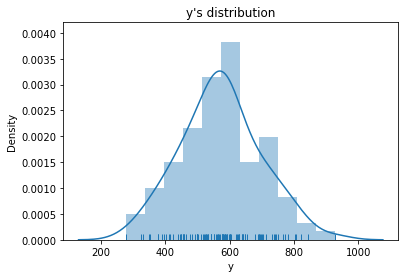

In [6]:
# 분위수 구하기 전, y의 분포 확인하기 

import seaborn as sns 
import matplotlib.pyplot as plt

sns.distplot(GO_data['y'], kde=True, rug=True)
plt.title("y's distribution")

plt.show()

# 분위수를 가져오는 방법 
 1. percentile 사용 
 2. describe에서 따오기 

## 1. percentile 사용 

numpy.percentile(a, q, axis=None, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
> interpolation 설정 (보간법) 

+ interpolation{‘linear’, ‘lower’, ‘higher’, ‘midpoint’, ‘nearest’}
+ This optional parameter specifies the interpolation method to use when the desired quantile lies between two data points i < j:

+ linear: i + (j - i) * fraction, where fraction is the fractional part of the index surrounded by i and j.

+ lower: i.

+ higher: j.

+ nearest: i or j, whichever is nearest.

+ midpoint: (i + j) / 2.

In [7]:
import numpy as np
a = np.arange(1,11)
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [8]:
# 기본은 선형 보간법 
# Q1 = 1+(10-1)*0.25
np.percentile(a,[0,25,50,75,100]) 

array([ 1.  ,  3.25,  5.5 ,  7.75, 10.  ])

In [9]:
np.percentile(a,[0,25,50,75,100],interpolation='linear') 

array([ 1.  ,  3.25,  5.5 ,  7.75, 10.  ])

In [10]:
np.percentile(a,[0,25,50,75,100],interpolation='lower') 

array([ 1,  3,  5,  7, 10])

In [11]:
np.percentile(a,[0,25,50,75,100],interpolation='higher') 

array([ 1,  4,  6,  8, 10])

In [12]:
np.percentile(a,[0,25,50,75,100],interpolation='nearest') 

array([ 1,  3,  5,  8, 10])

In [13]:
np.percentile(a,[0,25,50,75,100],interpolation='midpoint') 

array([ 1. ,  3.5,  5.5,  7.5, 10. ])

In [14]:
np.percentile( GO_data['y'], [25,50,75], interpolation ='linear')
# Q1- 500, Q2-575, Q3-641

array([500., 575., 641.])

## describe 사용 

In [15]:
GO_data['y'].describe()['25%']

500.0

In [16]:
GO_data['y'].describe()['50%']

575.0

In [17]:
GO_data['y'].describe()['75%']

641.0

# 분위수로 4개 그룹 나누기 

In [18]:
Q1=GO_data['y'].describe()['25%']
Q2=GO_data['y'].describe()['50%']
Q3=GO_data['y'].describe()['75%']

In [19]:
Q1

500.0

In [20]:
# 외부변수 따올 때 f {} 사용  
GO_data.query(f'y<{Q1}')

,TEAM_WIns,SOLO_WIns,TEAM_Losses,SOLO_Losses,win,lose,defaultRating,additionalRating,SOLO_TIAR_SCORE,TEAM_TIAR_SCORE,y
7,8,184,4,161,6,0,400,47,475,375,447
8,12,18,6,18,26,37,575,-97,550,500,478
14,58,29,71,27,39,51,500,-85,500,450,415
21,72,86,73,65,31,56,600,-150,600,550,450
28,76,117,88,119,20,39,400,-121,400,400,279
33,33,98,49,106,47,58,500,-45,500,425,455
34,8,64,3,76,2,3,500,-9,425,450,491
35,50,62,50,52,28,40,400,-69,600,550,331
43,55,22,62,8,42,49,400,-22,450,525,378
49,5,78,6,78,1,2,400,-9,400,350,391


In [21]:
## y < Q1  : Group1 
## Q1 < y < Q2 : Group 2 
## Q2 < y < Q3 : Group 3
## y >Q4 : Group 4 
group=[]
for rate in GO_data['y']:
    if rate<Q1 :
        group.append(1)
    elif rate < Q2 :
        group.append(2)
    elif rate < Q3 :
        group.append(3)
    else :
        group.append(4)

In [22]:
GO_data['y_group']=group
GO_data

,TEAM_WIns,SOLO_WIns,TEAM_Losses,SOLO_Losses,win,lose,defaultRating,additionalRating,SOLO_TIAR_SCORE,TEAM_TIAR_SCORE,y,y_group
0,26,249,27,238,11,6,600,39,600,475,639,3
1,40,31,33,13,174,160,725,20,725,650,745,4
2,23,37,16,23,0,0,625,0,600,600,625,3
3,19,68,18,58,77,54,775,153,775,675,928,4
4,21,42,17,30,8,4,750,33,700,575,783,4
...,...,...,...,...,...,...,...,...,...,...,...,...
97,11,44,3,50,5,8,550,-19,525,400,531,2
98,30,94,32,64,0,1,775,-8,700,675,767,4
99,72,77,75,66,4,10,700,-51,725,550,649,4
100,5,10,6,11,1,4,400,-24,400,350,376,1


In [23]:
del GO_data['y']

In [24]:
GO_data

,TEAM_WIns,SOLO_WIns,TEAM_Losses,SOLO_Losses,win,lose,defaultRating,additionalRating,SOLO_TIAR_SCORE,TEAM_TIAR_SCORE,y_group
0,26,249,27,238,11,6,600,39,600,475,3
1,40,31,33,13,174,160,725,20,725,650,4
2,23,37,16,23,0,0,625,0,600,600,3
3,19,68,18,58,77,54,775,153,775,675,4
4,21,42,17,30,8,4,750,33,700,575,4
...,...,...,...,...,...,...,...,...,...,...,...
97,11,44,3,50,5,8,550,-19,525,400,2
98,30,94,32,64,0,1,775,-8,700,675,4
99,72,77,75,66,4,10,700,-51,725,550,4
100,5,10,6,11,1,4,400,-24,400,350,1


# 다중공선성 제거하기 

1. corr() 확인하여 높은 상관관계 갖는 변수 제거 
2. VIF 분산팽창요인 > 10 제거

In [25]:
X = GO_data.drop('y_group', axis=1)
Y = GO_data[['y_group']]

In [26]:
# 상관관계표 못그리므로 수치로 확인 
X.corr()
# win 과 lose 당연한 관계이므로 win 하나만 사용하자

,TEAM_WIns,SOLO_WIns,TEAM_Losses,SOLO_Losses,win,lose,defaultRating,additionalRating,SOLO_TIAR_SCORE,TEAM_TIAR_SCORE
TEAM_WIns,1.000000,0.077680,0.975422,0.085221,0.197956,0.213794,0.025202,-0.010877,0.017242,0.296904
SOLO_WIns,0.077680,1.000000,0.070594,0.991107,-0.055344,-0.049673,0.017478,0.003550,0.153310,0.022970
TEAM_Losses,0.975422,0.070594,1.000000,0.085336,0.190919,0.221817,-0.044303,-0.072428,-0.048945,0.208914
SOLO_Losses,0.085221,0.991107,0.085336,1.000000,-0.062126,-0.056987,-0.007780,-0.000603,0.097732,-0.007909
win,0.197956,-0.055344,0.190919,-0.062126,1.000000,0.976065,0.138424,0.373727,0.212191,0.295514
lose,0.213794,-0.049673,0.221817,-0.056987,0.976065,1.000000,0.095030,0.171551,0.174096,0.252269
defaultRating,0.025202,0.017478,-0.044303,-0.007780,0.138424,0.095030,1.000000,0.165236,0.852312,0.719249
additionalRating,-0.010877,0.003550,-0.072428,-0.000603,0.373727,0.171551,0.165236,1.000000,0.193377,0.249582
SOLO_TIAR_SCORE,0.017242,0.153310,-0.048945,0.097732,0.212191,0.174096,0.852312,0.193377,1.000000,0.756518
TEAM_TIAR_SCORE,0.296904,0.022970,0.208914,-0.007909,0.295514,0.252269,0.719249,0.249582,0.756518,1.000000


In [27]:
X = X.drop(['TEAM_Losses', 'SOLO_Losses','lose'], axis =1 )
X

,TEAM_WIns,SOLO_WIns,win,defaultRating,additionalRating,SOLO_TIAR_SCORE,TEAM_TIAR_SCORE
0,26,249,11,600,39,600,475
1,40,31,174,725,20,725,650
2,23,37,0,625,0,600,600
3,19,68,77,775,153,775,675
4,21,42,8,750,33,700,575
...,...,...,...,...,...,...,...
97,11,44,5,550,-19,525,400
98,30,94,0,775,-8,700,675
99,72,77,4,700,-51,725,550
100,5,10,1,400,-24,400,350


In [30]:
# 다중공선성 확인 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF_factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['feature']=X.columns
vif = vif.sort_values('VIF_factor').reset_index(drop=True)
vif

# 10 보다 큰 변수 3개제거 

,VIF_factor,feature
0,1.180389,additionalRating
1,1.916479,win
2,2.246719,SOLO_WIns
3,3.029868,TEAM_WIns
4,113.713335,TEAM_TIAR_SCORE
5,134.174311,defaultRating
6,194.929483,SOLO_TIAR_SCORE


In [31]:
X=X.drop(['TEAM_TIAR_SCORE','defaultRating','SOLO_TIAR_SCORE'], axis=1)
X 

,TEAM_WIns,SOLO_WIns,win,additionalRating
0,26,249,11,39
1,40,31,174,20
2,23,37,0,0
3,19,68,77,153
4,21,42,8,33
...,...,...,...,...
97,11,44,5,-19
98,30,94,0,-8
99,72,77,4,-51
100,5,10,1,-24


In [32]:
Y

,y_group
0,3
1,4
2,3
3,4
4,4
...,...
97,2
98,4
99,4
100,1


# 앞으로 확인해야 할 것 
모든 변수를 넣은 모델이 예측을 잘 하는가 vs 변수를 골라낸 모델이 예측을 잘 하는가 